#  1.Introduction

This is Jia (Julia)LIAO NVIDA Nvidia Stock Research portfolio. The main purpose of this portfolio is to demonstrate my coding skill related to the Python Polars library. The entire case focuses on Nvidia's stock data and determine for factors that may affect stock prices to support possible future stock predictions.

In this case, I used time series stock data from yfinance, Google Trends data from pytrends, and propose four questions as following:
* 1. Long-term Trend: Over the past ten years, what kind of trend has NVIDIA's stock price shown?  (Interval detailed to every day)
* 2. Short-term Trend: What significant trend changes have occurred in the stock price over the past 60 days?  (Interval detailed to every 15 minutes)
* 3. The impact of brand popularity and topic discussion: Is there any correlation between NVIDIA's stock performance and Google Trends?
* 4. Comparison with Industry Trends: Compared to other companies in the same industry, such as AMD and Intel, how does NVIDIA's stock price trend?



In [ ]:
!pip install yfinance
!pip install polars
!pip install pandas

# **2. Long-term Trend: Over the past ten years, what kind of trend has NVIDIA's stock price shown?  (Interval detailed to every day)**


### 2.1 Fetch NVIDIA stock price data in the past decade from yfinance

In [ ]:
import yfinance as yf
import polars as pl
import datetime

# Define time range from 10 years ago to today
end =  datetime.datetime.now()
start = end - datetime.timedelta(days=10*365)

# Define the ticker symbol, set the company name as a variable here for future code reuse
ticker = "NVDA"

# Obtain Nvidia stock data
df_pandas = yf.download(ticker, start=start, end=end)

# Convert Pandas Dataframe to Polars Dataframe
df_polars = pl.DataFrame(df_pandas.reset_index())

# print Polars DataFrame
print(df_polars)

[*********************100%%**********************]  1 of 1 completed

shape: (2_515, 7)
┌─────────────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┐
│ Date                ┆ Open       ┆ High       ┆ Low        ┆ Close      ┆ Adj Close  ┆ Volume    │
│ ---                 ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│ datetime[ns]        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64       │
╞═════════════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│ 2014-08-11 00:00:00 ┆ 0.4755     ┆ 0.4775     ┆ 0.47125    ┆ 0.4725     ┆ 0.449791   ┆ 344624000 │
│ 2014-08-12 00:00:00 ┆ 0.47225    ┆ 0.475      ┆ 0.46725    ┆ 0.4725     ┆ 0.449791   ┆ 296152000 │
│ 2014-08-13 00:00:00 ┆ 0.47325    ┆ 0.47925    ┆ 0.47025    ┆ 0.47525    ┆ 0.452408   ┆ 256596000 │
│ 2014-08-14 00:00:00 ┆ 0.477      ┆ 0.477      ┆ 0.468      ┆ 0.47       ┆ 0.447411   ┆ 255992000 │
│ …                   ┆ …          ┆ …          ┆ …          ┆ …         

## General descriptive

In [ ]:
# To see a general descriptive statistics first
print(df_polars.describe())

shape: (9, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ describe   ┆ Date       ┆ Open       ┆ High      ┆ Low       ┆ Close     ┆ Adj Close ┆ Volume    │
│ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆ str        ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 2515       ┆ 2515.0     ┆ 2515.0    ┆ 2515.0    ┆ 2515.0    ┆ 2515.0    ┆ 2515.0    │
│ null_count ┆ 0          ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ mean       ┆ null       ┆ 15.607973  ┆ 15.896278 ┆ 15.294024 ┆ 15.607384 ┆ 15.579561 ┆ 4.6728e8  │
│ std        ┆ null       ┆ 23.382699  ┆ 23.823249 ┆ 22.850757 ┆ 23.345174 ┆ 23.351561 ┆ 2.5428e8  │
│ min        ┆ 2014-08-11 ┆ 0.42325    ┆ 0.4325    ┆ 0.41925   ┆ 0.41975   ┆ 

In [ ]:
# Date of highest price and highest turnover volume

max_open = df_polars['Open'].max()
max_high = df_polars['High'].max()
max_low = df_polars['Low'].max()
max_close = df_polars['Close'].max()
max_volume = df_polars['Volume'].max()


# Find the dates when these maximum values occurred
max_open_date = df_polars.filter(df_polars['Open'] == max_open)['Date'][0]
max_high_date = df_polars.filter(df_polars['High'] == max_high)['Date'][0]
max_low_date = df_polars.filter(df_polars['Low'] == max_low)['Date'][0]
max_close_date = df_polars.filter(df_polars['Close'] == max_close)['Date'][0]
max_volume_date = df_polars.filter(df_polars['Volume'] == max_volume)['Date'][0]

# Print the maximum values and their corresponding dates
print(f"The maximum opening price over the past ten years is {max_open} on {max_open_date}.")
print(f"The maximum high price over the past ten years is {max_high} on {max_high_date}.")
print(f"The maximum low price over the past ten years is {max_low} on {max_low_date}.")
print(f"The maximum closing price over the past ten years is {max_close} on {max_close_date}.")
print(f"The maximum turnover volume over the past ten years is {max_volume} on {max_volume_date}.")



The maximum opening price over the past ten years is 139.8000030517578 on 2024-06-20 00:00:00.
The maximum high price over the past ten years is 140.75999450683594 on 2024-06-20 00:00:00.
The maximum low price over the past ten years is 132.4199981689453 on 2024-07-10 00:00:00.
The maximum closing price over the past ten years is 135.5800018310547 on 2024-06-18 00:00:00.
The maximum turnover volume over the past ten years is 3692928000 on 2017-06-09 00:00:00.


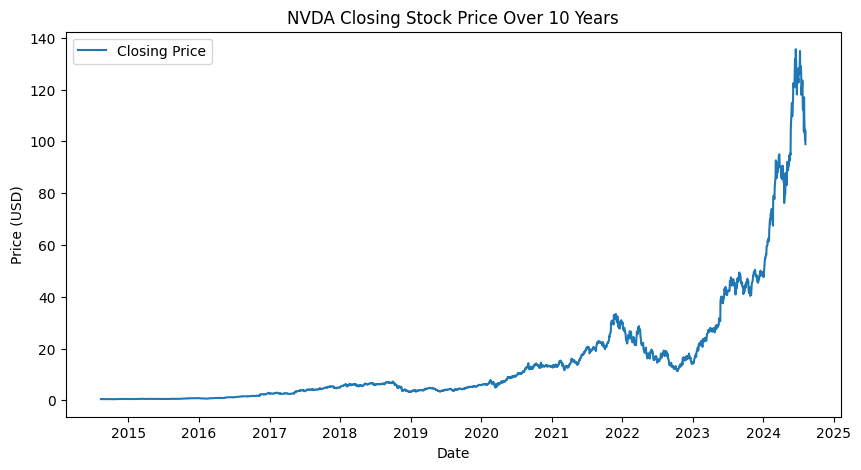

In [ ]:
import matplotlib.pyplot as plt

# Plotting the closing prices with common data visualization functions
plt.figure(figsize=(10, 5))
plt.plot(df_polars['Date'], df_polars['Close'], label='Closing Price')


plt.title(str(ticker)+' Closing Stock Price Over 10 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## 2.2 Calculate the moving averages with polars function

In [ ]:
# Calculate the moving averages with polars library function
df_polars = df_polars.with_columns(
    [
        df_polars['Close'].rolling_mean(window_size=30, min_periods=1).alias('30_day_MA'),
        df_polars['Close'].rolling_mean(window_size=180, min_periods=1).alias('180_day_MA')
    ]
)

print(df_polars)

shape: (2_515, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Date      ┆ Open      ┆ High      ┆ Low       ┆ … ┆ Adj Close ┆ Volume    ┆ 30_day_MA ┆ 180_day_ │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ MA       │
│ datetime[ ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i64       ┆ f64       ┆ ---      │
│ ns]       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2014-08-1 ┆ 0.4755    ┆ 0.4775    ┆ 0.47125   ┆ … ┆ 0.449791  ┆ 344624000 ┆ 0.4725    ┆ 0.4725   │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 00:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-08-1 ┆ 0.47225   ┆ 0.475     ┆ 0.46725   ┆ … ┆ 0.449791  ┆ 2961520

## 2.3 Comparison of two data visualization codes

### 2.3.1 Plotting with normal functions, directly plt. plot()

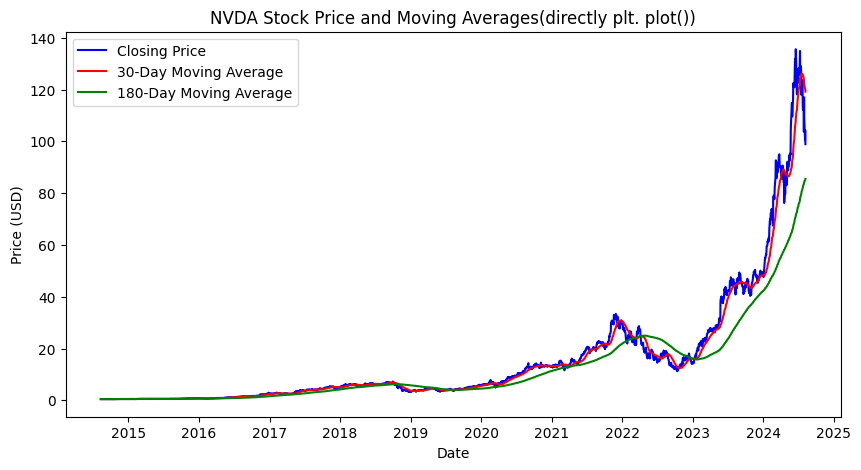

In [ ]:
# Plotting the moving averages along with the closing prices with common data visualization functions
# Traditional way, suitable for small group data
plt.figure(figsize=(10, 5))
plt.plot(df_polars['Date'], df_polars['Close'], label='Closing Price', color='blue')
plt.plot(df_polars['Date'], df_polars['30_day_MA'], label='30-Day Moving Average', color='red')
plt.plot(df_polars['Date'], df_polars['180_day_MA'], label='180-Day Moving Average', color='green')
plt.title(str(ticker)  +' Stock Price and Moving Averages(directly plt. plot())')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### 2.3.2 Plotting by using For Loop

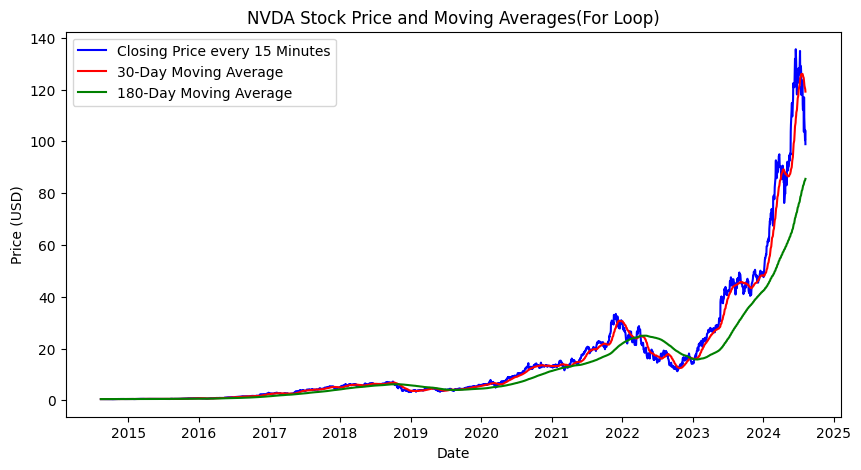

In [ ]:
# Plotting the close prices with for Loop
# The outcome line chart is look like same but this coding way has higher scalability than plt.plot()

# Columns to plot and their labels
columns_to_plot = [
    ('Close', 'Closing Price every 15 Minutes', 'blue'),
    ('30_day_MA', '30-Day Moving Average', 'red'),
    ('180_day_MA', '180-Day Moving Average', 'green')
]

plt.figure(figsize=(10, 5))

# Plot each column using a loop
for column, label, color in columns_to_plot:
    plt.plot(df_polars['Date'], df_polars[column], label=label, color=color)

plt.title(f'{ticker} Stock Price and Moving Averages(For Loop)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## 2.4 Discoveries on Long-term Trend: NVIDIA's stock price trend over the past ten years**

Over the past ten years, the analysis of NVIDIA's stock prices and trading volumes has revealed the following key highlights:

*	The long-term upward trend highlighted by the 180-day moving average (green line) suggests that NVIDIA has been a strong performer over the past decade.
*	But, the 30-day moving average (red line) shows a downward trend, indicating that there has been pullback in the stock price recently.
*	Overall, there is a significant upward trend, especially noticeable from around 2020 onwards.



# **3. Short-term Trend: What significant trend changes have occurred in the stock price over the past 60 day?(Interval detailed to every 15 minutes)**

### 3.1 Fetch NVIDIA stock price data in past 60 day from yfinance (Interval every 15 minutes)

In [ ]:
# Define time range 60 days
end = datetime.datetime.now()
start = end - datetime.timedelta(days=60)

# Obtain Nvidia stock data interval every 15minute
df_pandas10min = yf.download(ticker, start=start, end=end, interval='15m')


# Convert Pandas Dataframe to Polars Dataframe
df_polars15min = pl.DataFrame(df_pandas10min.reset_index())

# print Polars DataFrame
print(df_polars15min)

[*********************100%%**********************]  1 of 1 completed

shape: (1_054, 7)
┌─────────────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬──────────┐
│ Datetime            ┆ Open       ┆ High       ┆ Low        ┆ Close      ┆ Adj Close  ┆ Volume   │
│ ---                 ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---      │
│ datetime[ns]        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64      │
╞═════════════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪══════════╡
│ 2024-06-10 09:30:00 ┆ 120.379997 ┆ 121.25     ┆ 119.300003 ┆ 119.324997 ┆ 119.324997 ┆ 41263952 │
│ 2024-06-10 09:45:00 ┆ 119.339996 ┆ 119.839996 ┆ 117.010002 ┆ 118.254997 ┆ 118.254997 ┆ 27107699 │
│ 2024-06-10 10:00:00 ┆ 118.260002 ┆ 119.300003 ┆ 117.860001 ┆ 118.760002 ┆ 118.760002 ┆ 14315105 │
│ 2024-06-10 10:15:00 ┆ 118.789902 ┆ 120.349998 ┆ 118.230003 ┆ 119.93     ┆ 119.93     ┆ 14784240 │
│ …                   ┆ …          ┆ …          ┆ …          ┆ …          ┆ …     

### 3.2 Calculate the moving averages with polars function

In [ ]:
# Calculate the moving averages with polars library function
df_polars15min = df_polars15min.with_columns(
    [
        df_polars15min['Close'].rolling_mean(window_size=24, min_periods=1).alias('6_hour_MA'),
        df_polars15min['Close'].rolling_mean(window_size=192, min_periods=1).alias('48_hour_MA'),
    ]
)

print(df_polars15min)

shape: (1_054, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ Datetime  ┆ Open      ┆ High      ┆ Low       ┆ … ┆ Adj Close ┆ Volume   ┆ 6_hour_MA ┆ 48_hour_M │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---       ┆ A         │
│ datetime[ ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i64      ┆ f64       ┆ ---       │
│ ns]       ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆ f64       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ 2024-06-1 ┆ 120.37999 ┆ 121.25    ┆ 119.30000 ┆ … ┆ 119.32499 ┆ 41263952 ┆ 119.32499 ┆ 119.32499 │
│ 0         ┆ 7         ┆           ┆ 3         ┆   ┆ 7         ┆          ┆ 7         ┆ 7         │
│ 09:30:00  ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆           │
│ 2024-06-1 ┆ 119.33999 ┆ 119.83999 ┆ 117.01000 ┆ … ┆ 118.25499 ┆ 2710769

### 3.3 Plotting with For Loop

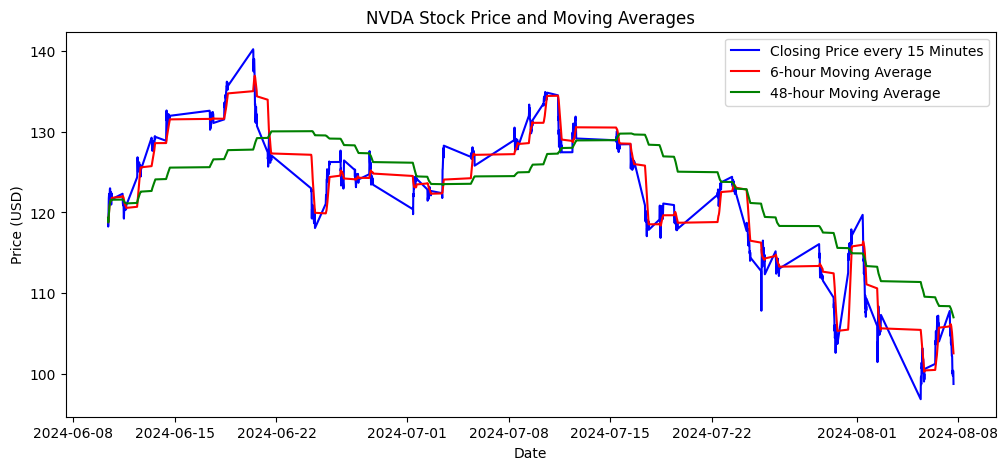

In [ ]:
# Plotting with for Loop
# Columns to plot and their labels
columns_to_plot = [
    ('Close', 'Closing Price every 15 Minutes', 'blue'),
    ('6_hour_MA', '6-hour Moving Average', 'red'),
    ('48_hour_MA', '48-hour Moving Average', 'green')
]

plt.figure(figsize=(12, 5))

# Plot each column using a loop
for column, label, color in columns_to_plot:
    plt.plot(df_polars15min['Datetime'], df_polars15min[column], label=label, color=color)

plt.title(f'{ticker} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## **3.4 Discoveries on short-term Trend and significant trend changes have occurred in the stock price over the past 60 day**



*   The stock exhibits significant short-term volatility, with frequent sharp rises and falls. This is evident from the jagged nature of the blue line representing the closing prices.
*   Several trend reversals are evident in the chart, where the stock price changes direction. These are captured by both moving averages, with the 6-hour moving average showing quicker responses to these changes.







# **4. The impact of brand popularity and topic discussion: is there a relationship between NVIDIA's stock performance and Google Trends?**

In [ ]:
# to using Google's trending search data
!pip install pytrends

## 4.1 Fetch NVIDIA Google Trend data in the past 5 years from pytrends

In [ ]:
from pytrends.request import TrendReq
import time

# Initialize pytrends request with US English locale and UTC+6(aka360) timezone
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keywords and timeframe( )
keywords = ["NVIDIA"]
timeframe = 'today 5-y'  # Last 5 years

# Build payload
pytrends.build_payload(keywords, timeframe=timeframe)

# Wait for a few seconds before making the request
time.sleep(10)  # Adjust the sleep time because without this sleep() API will reject my call.

# Get interest over time
interest_over_time_df = pytrends.interest_over_time()
# If this fails during the rerun, it is likely due to too frequent calls and due to too frequent calls from same IP(with code 429)
# The code itself is 100% correct and I have obtained the data successful.
# Changing IP or free up memory then rerun again may solve the 429 errors,

# Convert Pandas DataFrame to Polars DataFrame
pl_df_GTrend = pl.DataFrame(interest_over_time_df.reset_index())



In [ ]:
# Display the DataFrame
print(pl_df_GTrend)
# The values are normalized and scaled from 0 to 100.
print(pl_df_GTrend.describe())

shape: (262, 3)
┌─────────────────────┬────────┬───────────┐
│ date                ┆ NVIDIA ┆ isPartial │
│ ---                 ┆ ---    ┆ ---       │
│ datetime[ns]        ┆ i64    ┆ bool      │
╞═════════════════════╪════════╪═══════════╡
│ 2019-08-04 00:00:00 ┆ 25     ┆ false     │
│ 2019-08-11 00:00:00 ┆ 26     ┆ false     │
│ 2019-08-18 00:00:00 ┆ 31     ┆ false     │
│ 2019-08-25 00:00:00 ┆ 30     ┆ false     │
│ …                   ┆ …      ┆ …         │
│ 2024-07-14 00:00:00 ┆ 62     ┆ false     │
│ 2024-07-21 00:00:00 ┆ 60     ┆ false     │
│ 2024-07-28 00:00:00 ┆ 71     ┆ false     │
│ 2024-08-04 00:00:00 ┆ 84     ┆ true      │
└─────────────────────┴────────┴───────────┘
shape: (9, 4)
┌────────────┬─────────────────────┬───────────┬───────────┐
│ describe   ┆ date                ┆ NVIDIA    ┆ isPartial │
│ ---        ┆ ---                 ┆ ---       ┆ ---       │
│ str        ┆ str                 ┆ f64       ┆ str       │
╞════════════╪═════════════════════╪═══════════╪═══

## 4.2 Pick only complete data in Google Trend

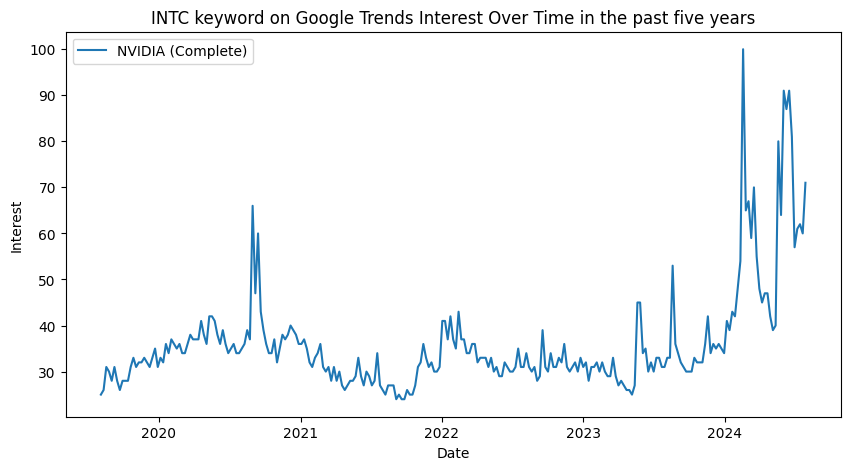

In [ ]:
 # Separate pick only complete data(Partial data refers to incomplete cycles, which can affect the accuracy of the data)
pl_df_GTrend_5y_c = pl_df_GTrend.filter(pl_df_GTrend['isPartial'] == False)

# Rename the first column of pl_df_GTrend_5y_c 'date' to 'Date'
pl_df_GTrend_5y_c = pl_df_GTrend_5y_c.rename({"date": "Date"})


# Plot ponly the complete data
plt.figure(figsize=(10, 5))
for keyword in keywords:
  plt.plot(pl_df_GTrend_5y_c['Date'], pl_df_GTrend_5y_c[keyword], label=f'{keyword} (Complete)', linestyle='-')

plt.title(str(ticker)+' keyword on Google Trends Interest Over Time in the past five years')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.show()


## 4.3 Get the complete Google trend period then fetch NVIDIA' stock data as the same time period

In [ ]:
# find the start and end date of pl_df_GTrend_5y_c to Obtain Nvidia stock data with same range time with Google Trends data
start_date = pl_df_GTrend_5y_c['Date'].min()
end_date = pl_df_GTrend_5y_c['Date'].max()
ticker = "NVDA"
print("Start Date:", start_date )
print("End Date:", end_date)

# Obtain Nvidia stock data with same range time with Google Trends data
df_pandas_Nvi_5y = yf.download(ticker, start=start_date, end=end_date)

# Convert Pandas Dataframe to Polars Dataframe
df_polars_Nvi_5y = pl.DataFrame(df_pandas_Nvi_5y.reset_index())

# print Polars DataFrame
print(df_polars_Nvi_5y)

[*********************100%%**********************]  1 of 1 completed

Start Date: 2019-08-04 00:00:00
End Date: 2024-07-28 00:00:00
shape: (1_253, 7)
┌─────────────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┐
│ Date                ┆ Open       ┆ High       ┆ Low        ┆ Close      ┆ Adj Close  ┆ Volume    │
│ ---                 ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│ datetime[ns]        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64       │
╞═════════════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│ 2019-08-05 00:00:00 ┆ 3.845      ┆ 3.84625    ┆ 3.7225     ┆ 3.76975    ┆ 3.748114   ┆ 589156000 │
│ 2019-08-06 00:00:00 ┆ 3.845      ┆ 3.89075    ┆ 3.76075    ┆ 3.80875    ┆ 3.78689    ┆ 361272000 │
│ 2019-08-07 00:00:00 ┆ 3.7475     ┆ 3.85925    ┆ 3.73       ┆ 3.84725    ┆ 3.825169   ┆ 372560000 │
│ 2019-08-08 00:00:00 ┆ 3.90525    ┆ 3.95775    ┆ 3.8475     ┆ 3.9565     ┆ 3.933792   ┆ 309300000 │
│ …        

## 4.4 Comparison of two kind of normalize codes

### 4.4.1 Normalize NVIDA stock columns by using For Loop

In [ ]:
# for loop normalize 'Close' and 'Volume' columns.
# more efficient and easily scalable way

for column in ['Close', 'Volume']:
    min_value = df_polars_Nvi_5y[column].min()
    max_value = df_polars_Nvi_5y[column].max()
    df_polars_Nvi_5y = df_polars_Nvi_5y.with_columns(
        ( (df_polars_Nvi_5y[column] - min_value) / (max_value - min_value) * 100).alias(f'Normalized_{column}')
    )

print(df_polars_Nvi_5y.dtypes)
print(df_polars_Nvi_5y.describe())


[Datetime(time_unit='ns', time_zone=None), Float64, Float64, Float64, Float64, Float64, Int64, Float64, Float64]
shape: (9, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ describe  ┆ Date      ┆ Open      ┆ High      ┆ … ┆ Adj Close ┆ Volume    ┆ Normalize ┆ Normaliz │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ d_Close   ┆ ed_Volum │
│ str       ┆ str       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ e        │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 1253      ┆ 1253.0    ┆ 1253.0    ┆ … ┆ 1253.0    ┆ 1253.0    ┆ 1253.0    ┆ 1253.0   │
│ null_coun ┆ 0         ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       

### 4.4.2 Normalize Google Trend with normal way

In [ ]:
# Normalize 'NVIDIA' prices to a 0-100 scale to make it can compare to Trends Interest data
# Traditional way, suitable for small group data or single column
# Although this Trend metadata is Normalized, in order to compare trends, I need to Normalize again to match the range of Normalized_Close and Normalized_Volume  values


min_close = pl_df_GTrend_5y_c['NVIDIA'].min()
max_close = pl_df_GTrend_5y_c['NVIDIA'].max()

Normalized_pl_df_GTrend_5y_c = pl_df_GTrend_5y_c.with_columns(
    ( (pl_df_GTrend_5y_c['NVIDIA'] - min_close) / (max_close - min_close) * 100).alias('Normalized_NVIDIA')
)


print(Normalized_pl_df_GTrend_5y_c.dtypes)
print(Normalized_pl_df_GTrend_5y_c)
print(Normalized_pl_df_GTrend_5y_c.describe())

[Datetime(time_unit='ns', time_zone=None), Int64, Boolean, Float64]
shape: (261, 4)
┌─────────────────────┬────────┬───────────┬───────────────────┐
│ Date                ┆ NVIDIA ┆ isPartial ┆ Normalized_NVIDIA │
│ ---                 ┆ ---    ┆ ---       ┆ ---               │
│ datetime[ns]        ┆ i64    ┆ bool      ┆ f64               │
╞═════════════════════╪════════╪═══════════╪═══════════════════╡
│ 2019-08-04 00:00:00 ┆ 25     ┆ false     ┆ 1.315789          │
│ 2019-08-11 00:00:00 ┆ 26     ┆ false     ┆ 2.631579          │
│ 2019-08-18 00:00:00 ┆ 31     ┆ false     ┆ 9.210526          │
│ 2019-08-25 00:00:00 ┆ 30     ┆ false     ┆ 7.894737          │
│ …                   ┆ …      ┆ …         ┆ …                 │
│ 2024-07-07 00:00:00 ┆ 61     ┆ false     ┆ 48.684211         │
│ 2024-07-14 00:00:00 ┆ 62     ┆ false     ┆ 50.0              │
│ 2024-07-21 00:00:00 ┆ 60     ┆ false     ┆ 47.368421         │
│ 2024-07-28 00:00:00 ┆ 71     ┆ false     ┆ 61.842105         │
└─────

## 4.5 Plotting Data from different data frames by using For Loop

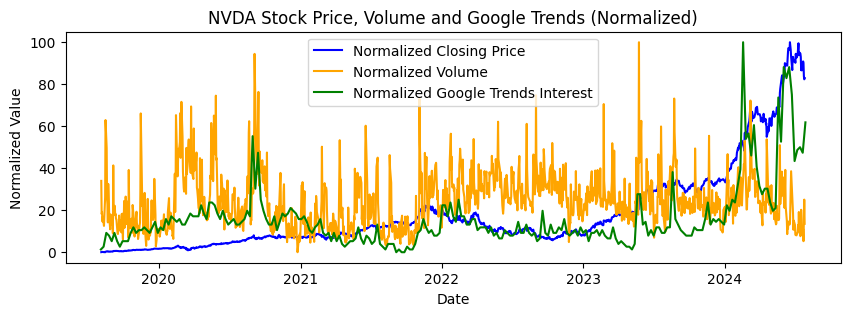

In [ ]:
# Plotting the Normalized data with for Loop
# Columns to plot and their labels
columns_to_plot = [
    ('Normalized_Close', 'Normalized Closing Price', 'blue'),
    ('Normalized_Volume', 'Normalized Volume', 'orange'),
    ('Normalized_NVIDIA', 'Normalized Google Trends Interest', 'green')
]

plt.figure(figsize=(10, 3))

# Plot each column using a loop
for column, label, color in columns_to_plot:
    # Check if the column exists in the DataFrame
    if column in Normalized_pl_df_GTrend_5y_c.columns:
        plt.plot(Normalized_pl_df_GTrend_5y_c['Date'], Normalized_pl_df_GTrend_5y_c[column], label=label, color=color)
    elif column in df_polars_Nvi_5y.columns:
        plt.plot(df_polars_Nvi_5y['Date'], df_polars_Nvi_5y[column], label=label, color=color)

plt.title(f'{ticker} Stock Price, Volume and Google Trends (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()


In [ ]:
df_polars_Nvi_5y

Date,Open,High,Low,Close,Adj Close,Volume,Normalized_Close,Normalized_Volume
datetime[ns],f64,f64,f64,f64,f64,i64,f64,f64
2019-08-05 00:00:00,3.845,3.84625,3.7225,3.76975,3.748114,589156000,0.038298,33.973916
2019-08-06 00:00:00,3.845,3.89075,3.76075,3.80875,3.78689,361272000,0.067875,18.214598
2019-08-07 00:00:00,3.7475,3.85925,3.73,3.84725,3.825169,372560000,0.097072,18.995219
2019-08-08 00:00:00,3.90525,3.95775,3.8475,3.9565,3.933792,309300000,0.179925,14.620474
2019-08-09 00:00:00,3.91525,3.91875,3.80375,3.8545,3.832377,341816000,0.10257,16.869118
2019-08-12 00:00:00,3.802,3.8545,3.76425,3.78625,3.764519,279200000,0.050811,12.538908
2019-08-13 00:00:00,3.78475,3.9475,3.7455,3.90125,3.878858,351956000,0.138024,17.57035
2019-08-14 00:00:00,3.8125,3.82375,3.70775,3.75175,3.730217,419880000,0.024647,22.267634
2019-08-15 00:00:00,3.77075,3.79075,3.68475,3.71925,3.697903,477200000,0.0,26.231599


## 4.6 Interpolation Null value data to conduct correlation analysis

### 4.6.1 Expand the Google Trend 5 years DataFrame date rangefrom by week to by day

In [ ]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Create a complete date range DataFrame on Normalized_pl_df_GTrend_5y_c
date_range = pl.DataFrame({"Date": pd.date_range(start=Normalized_pl_df_GTrend_5y_c['Date'].min(),
                                                 end=Normalized_pl_df_GTrend_5y_c['Date'].max(),
                                                 freq='D')})

# Join the original DataFrame with the complete date range, ensuring no dates are out of the original range
Normalized_pl_df_GTrend_5y_c_full = date_range.join(Normalized_pl_df_GTrend_5y_c, on='Date', how='left')


# Display the DataFrame with the complete date range to verify
print(Normalized_pl_df_GTrend_5y_c_full)


shape: (1_821, 4)
┌─────────────────────┬────────┬───────────┬───────────────────┐
│ Date                ┆ NVIDIA ┆ isPartial ┆ Normalized_NVIDIA │
│ ---                 ┆ ---    ┆ ---       ┆ ---               │
│ datetime[ns]        ┆ i64    ┆ bool      ┆ f64               │
╞═════════════════════╪════════╪═══════════╪═══════════════════╡
│ 2019-08-04 00:00:00 ┆ 25     ┆ false     ┆ 1.315789          │
│ 2019-08-05 00:00:00 ┆ null   ┆ null      ┆ null              │
│ 2019-08-06 00:00:00 ┆ null   ┆ null      ┆ null              │
│ 2019-08-07 00:00:00 ┆ null   ┆ null      ┆ null              │
│ …                   ┆ …      ┆ …         ┆ …                 │
│ 2024-07-25 00:00:00 ┆ null   ┆ null      ┆ null              │
│ 2024-07-26 00:00:00 ┆ null   ┆ null      ┆ null              │
│ 2024-07-27 00:00:00 ┆ null   ┆ null      ┆ null              │
│ 2024-07-28 00:00:00 ┆ 71     ┆ false     ┆ 61.842105         │
└─────────────────────┴────────┴───────────┴───────────────────┘


### Interpolate data with interpolate()

In [ ]:
#  linear interpolation (in Pandas)
Normalized_pl_df_GTrend_5y_c_full = Normalized_pl_df_GTrend_5y_c_full.with_columns(
    pl.col("Normalized_NVIDIA").interpolate()
)

print(Normalized_pl_df_GTrend_5y_c_full)
print(Normalized_pl_df_GTrend_5y_c_full.describe())


shape: (1_821, 4)
┌─────────────────────┬────────┬───────────┬───────────────────┐
│ Date                ┆ NVIDIA ┆ isPartial ┆ Normalized_NVIDIA │
│ ---                 ┆ ---    ┆ ---       ┆ ---               │
│ datetime[ns]        ┆ i64    ┆ bool      ┆ f64               │
╞═════════════════════╪════════╪═══════════╪═══════════════════╡
│ 2019-08-04 00:00:00 ┆ 25     ┆ false     ┆ 1.315789          │
│ 2019-08-05 00:00:00 ┆ null   ┆ null      ┆ 1.503759          │
│ 2019-08-06 00:00:00 ┆ null   ┆ null      ┆ 1.691729          │
│ 2019-08-07 00:00:00 ┆ null   ┆ null      ┆ 1.879699          │
│ …                   ┆ …      ┆ …         ┆ …                 │
│ 2024-07-25 00:00:00 ┆ null   ┆ null      ┆ 55.639098         │
│ 2024-07-26 00:00:00 ┆ null   ┆ null      ┆ 57.706767         │
│ 2024-07-27 00:00:00 ┆ null   ┆ null      ┆ 59.774436         │
│ 2024-07-28 00:00:00 ┆ 71     ┆ false     ┆ 61.842105         │
└─────────────────────┴────────┴───────────┴───────────────────┘
shape: 

In [ ]:
print(df_polars_Nvi_5y)

shape: (1_253, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Date      ┆ Open      ┆ High      ┆ Low       ┆ … ┆ Adj Close ┆ Volume    ┆ Normalize ┆ Normaliz │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ d_Close   ┆ ed_Volum │
│ datetime[ ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i64       ┆ ---       ┆ e        │
│ ns]       ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2019-08-0 ┆ 3.845     ┆ 3.84625   ┆ 3.7225    ┆ … ┆ 3.748114  ┆ 589156000 ┆ 0.038298  ┆ 33.97391 │
│ 5         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6        │
│ 00:00:00  ┆           ┆           ┆           ┆   ┆           ┆        

## 4.7 Merge dataframes to plot by for Loop

 4.7.1 Merge the two dataframes

In [ ]:
# Merge the two dataframes
joined_df_polars_Nvi_G_5y = df_polars_Nvi_5y.join(Normalized_pl_df_GTrend_5y_c_full.select(['Date', 'Normalized_NVIDIA']), left_on='Date', right_on='Date', how='inner')

print(joined_df_polars_Nvi_G_5y.columns)


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Normalized_Close', 'Normalized_Volume', 'Normalized_NVIDIA']


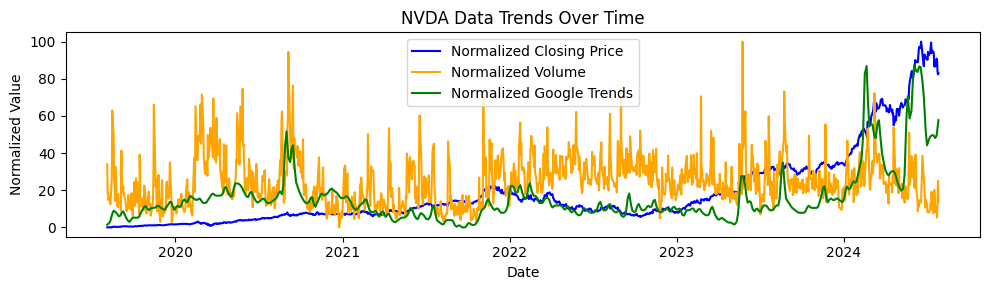

In [ ]:
# Plot by For Loop
# Columns to plot and their labels
columns_to_plot = [
    ('Normalized_Close', 'Normalized Closing Price', 'blue'),
    ('Normalized_Volume', 'Normalized Volume', 'orange'),
    ('Normalized_NVIDIA', 'Normalized Google Trends', 'green')
]

plt.figure(figsize=(10, 3))

# Plot each column using a loop
for column, label, color in columns_to_plot:
    plt.plot(joined_df_polars_Nvi_G_5y['Date'].to_list(), joined_df_polars_Nvi_G_5y[column].to_list(), label=label, color=color)

plt.title(f'{ticker} Data Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

## 4.8 Correlation matrix by pick column name .corr()

In [ ]:

# Calculate the correlation matrix in Normalized_Close, Normalized_Volume and  Interpolated_Normalized_NVIDIA

correlation_matrix = joined_df_polars_Nvi_G_5y[['Normalized_Close', 'Normalized_Volume', 'Normalized_NVIDIA']].corr()

# Display the correlation matrix
print(correlation_matrix)


shape: (3, 3)
┌──────────────────┬───────────────────┬───────────────────┐
│ Normalized_Close ┆ Normalized_Volume ┆ Normalized_NVIDIA │
│ ---              ┆ ---               ┆ ---               │
│ f64              ┆ f64               ┆ f64               │
╞══════════════════╪═══════════════════╪═══════════════════╡
│ 1.0              ┆ -0.002092         ┆ 0.73827           │
│ -0.002092        ┆ 1.0               ┆ 0.161244          │
│ 0.73827          ┆ 0.161244          ┆ 1.0               │
└──────────────────┴───────────────────┴───────────────────┘


## 4.9: Discoveries on data correlation between NVIDIA's stock performance and Google Trends

* Close price & Volume: Interpretation: The correlation between the Close price and volume is nearly zero (-0.002). This indicates there is no significant linear relationship between the stock's closing price and its trading volume. Changes in the closing price do not correspond to consistent changes in the trading volume and vice versa.

* Volume & NVIDIA Google Trend: Interpretation: The correlation between the volume and the Google search interest for "NVIDIA" is weakly positive (0.1591). While there is a positive relationship, it is not strong. This suggests that increased public interest in NVIDIA, as indicated by search trends, might lead to a slight increase in trading volume, but the relationship is not strong enough to be considered significant.



* Close price & NVIDIA Google Trend: There is a strong positive correlation between the Close price and the Google search interest for "NVIDIA" (0.74). This suggests that as public interest in NVIDIA increases, as indicated by Google Trends, the stock's closing price also tends to rise. This strong correlation indicates that search interest could potentially be a indicator which could be taken into consideration of when doing stock price prediction.





# 5.Comparison with Industry Trends: Compared to other companies in the same industry (such as AMD and Intel), how does NVIDIA's stock price trend?


## 5.1 Fatch multiple stocks data by using for loop and store in dictionary

In [ ]:
import yfinance as yf
import polars as pl
import pandas as pd
import datetime

# Define time range from 60d ago to today
end =  datetime.datetime.now()
start = end - datetime.timedelta(days=60)


# Define the ticker symbols and fetch data using yfinance
tickers = ["NVDA", "AMD", "INTC"]
interval = '2m'

# Initialize an empty dictionary
data_pd = {}

# Fetch the data by using for loop
for ticker in tickers:
    data_pd[ticker] = yf.download(ticker, start=start, interval=interval)


# Print the dictionary keys (ticker symbols)
print(data_pd.keys())


# For loop print each ticker
for ticker in tickers:
    print(f"{ticker}")
    print(data_pd[ticker])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

dict_keys(['NVDA', 'AMD', 'INTC'])


In [ ]:
# Convert Pandas Dataframe to Polars Dataframe
data_pl = {}
for ticker in tickers:
  data_pl[ticker] = pl.DataFrame(data_pd[ticker].reset_index())

# Print the Polars DataFrames
for ticker, df in data_pl.items():
  print(f"{ticker} {df}")


NVDA shape: (6_341, 7)
┌──────────────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬──────────┐
│ Datetime             ┆ Open       ┆ High       ┆ Low        ┆ Close      ┆ Adj Close  ┆ Volume   │
│ ---                  ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---      │
│ datetime[ns,         ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64      │
│ America/New_York]    ┆            ┆            ┆            ┆            ┆            ┆          │
╞══════════════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪══════════╡
│ 2024-06-21 09:30:00  ┆ 127.0      ┆ 127.809998 ┆ 125.730003 ┆ 127.686699 ┆ 127.686699 ┆ 57448068 │
│ EDT                  ┆            ┆            ┆            ┆            ┆            ┆          │
│ 2024-06-21 09:32:00  ┆ 127.650101 ┆ 128.089996 ┆ 127.089996 ┆ 127.550003 ┆ 127.550003 ┆ 5605476  │
│ EDT                  ┆            ┆            ┆            ┆     

In [ ]:
# To see a general descriptive statistics on data_pl.

for ticker, df in data_pl.items():
    print(f"{ticker} {df.describe()}")


NVDA shape: (9, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ describe   ┆ Datetime   ┆ Open       ┆ High      ┆ Low       ┆ Close     ┆ Adj Close ┆ Volume    │
│ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆ str        ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 6341       ┆ 6341.0     ┆ 6341.0    ┆ 6341.0    ┆ 6341.0    ┆ 6341.0    ┆ 6341.0    │
│ null_count ┆ 0          ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ mean       ┆ null       ┆ 119.9139   ┆ 120.10852 ┆ 119.70549 ┆ 119.90984 ┆ 119.90984 ┆ 1.5725e6  │
│            ┆            ┆            ┆ 7         ┆ 6         ┆ 3         ┆ 3         ┆           │
│ std        ┆ null       ┆ 8.814236   ┆ 8.775101  ┆ 8.854462  ┆ 8.81447

## 5.2 Calculate and plot moving averages by For loop

### 5.2.1 Plotting moving averages data visualization from different data frames in library by using For Loop with finance stock graphic

In [ ]:
# Retrieve the first row of all three ticker DataFrames and extract the YYYY-MM-DD portion of the 'Datetime' column
for ticker, df in data_pl.items():
  first_row = df.head(1)
  first_date  = first_row['Datetime'][0].strftime('%Y-%m-%d')
  print(f" {ticker} {first_date}")


 NVDA 2024-06-21
 AMD 2024-06-21
 INTC 2024-06-21


In [ ]:
# Count rows containing first_date in each ticker DataFrame
for ticker, df in data_pl.items():
  first_row = df.head(1)
  first_date  = first_row['Datetime'][0].strftime('%Y-%m-%d')
  count = df.filter(pl.col('Datetime').dt.strftime('%Y-%m-%d') == first_date).shape[0]
  print(f"Number of rows in {ticker} containing {first_date}: {count}")


Number of rows in NVDA containing 2024-06-21: 195
Number of rows in AMD containing 2024-06-21: 195
Number of rows in INTC containing 2024-06-21: 195


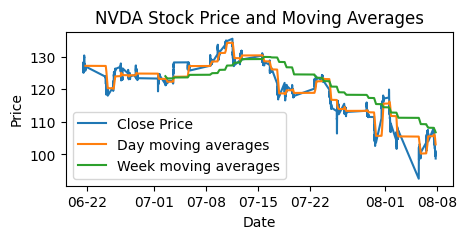

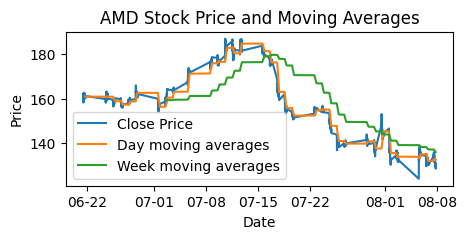

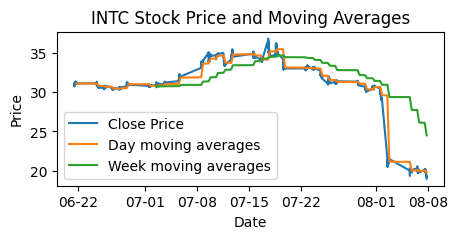

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate moving averages
for ticker, df in data_pl.items():
    df = df.with_columns([
        pl.col('Close').rolling_mean(window_size=count).alias(f'day_MA'),
        pl.col('Volume').rolling_mean(window_size=count).alias(f'day_V'),
        pl.col('Close').rolling_mean(window_size=7*count).alias(f'week_MA'),
        pl.col('Volume').rolling_mean(window_size=7*count).alias(f'week_V')

    ])
    data_pl[ticker] = df

# Plot moving averages


for ticker, df in data_pl.items():
    plt.figure(figsize=(5, 2))
    plt.plot(df['Datetime'], df['Close'], label='Close Price')
    plt.plot(df['Datetime'], df['day_MA'], label='Day moving averages')
    plt.plot(df['Datetime'], df['week_MA'], label='Week moving averages')
    plt.title(f"{ticker} Stock Price and Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    # Format x-axis to display only MM-DD
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.show()




In [ ]:
# To see a general descriptive statistics on data_pl.

for ticker, df in data_pl.items():
    print(f"{ticker} {df.describe()}")

### 5.2.2 Plot all tickers on the same plot for comparison

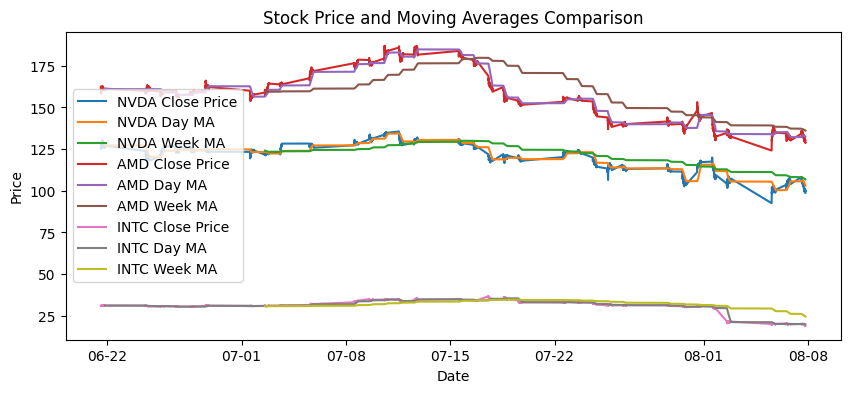

In [ ]:
# Plot all tickers on the same plot for comparison
plt.figure(figsize=(10, 4))

for ticker, df in data_pl.items():
    plt.plot(df['Datetime'], df['Close'], label=f'{ticker} Close Price')
    plt.plot(df['Datetime'], df['day_MA'], label=f'{ticker} Day MA')
    plt.plot(df['Datetime'], df['week_MA'], label=f'{ticker} Week MA')

plt.title("Stock Price and Moving Averages Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Format x-axis to display only MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.show()


## 5.3 Normalize columns for each ticker then plot all tickers on the same plot for comparison

In [ ]:
# Remove rows with null values in any column
for ticker, df in data_pl.items():
  data_pl[ticker] = df.drop_nulls()

# Print the updated DataFrames
for ticker, df in data_pl.items():
  print(f"{ticker}\n{df.head()}")


NVDA
shape: (5, 11)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬──────────┐
│ Datetime   ┆ Open      ┆ High      ┆ Low       ┆ … ┆ day_MA    ┆ day_V    ┆ week_MA   ┆ week_V   │
│ ---        ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ datetime[n ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
│ s, America ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆          │
│ /New_York] ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆          │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪══════════╡
│ 2024-07-02 ┆ 121.08999 ┆ 121.85379 ┆ 121.02999 ┆ … ┆ 123.20346 ┆ 1.4306e6 ┆ 124.05818 ┆ 1.7093e6 │
│ 09:30:00   ┆ 6         ┆ 8         ┆ 9         ┆   ┆ 5         ┆          ┆ 3         ┆          │
│ EDT        ┆           ┆           ┆           ┆   ┆           ┆     

In [ ]:
# Normalize the columns for each ticker
for ticker, df in data_pl.items():
    for column in ['Close','Volume','day_V', 'week_V','day_MA', 'week_MA']:
        min_value = df[column].min()
        max_value = df[column].max()
        df = df.with_columns(
            ((df[column] - min_value) / (max_value - min_value) * 100).alias(f'Normalized_{column}')
        )
    data_pl[ticker] = df

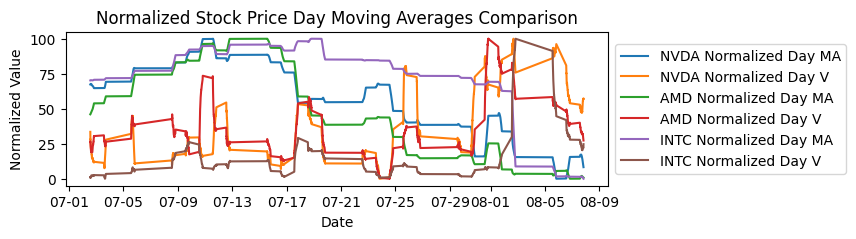

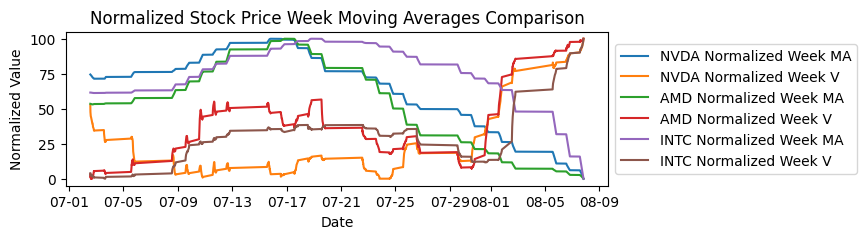

In [ ]:
# Plot the normalized moving averages for all tickers on the same plot
plt_d = plt
plt_d.figure(figsize=(7, 2))

for ticker, df in data_pl.items():
    plt_d.plot(df['Datetime'], df['Normalized_day_MA'], label=f'{ticker} Normalized Day MA')
    plt_d.plot(df['Datetime'], df['Normalized_day_V'], label=f'{ticker} Normalized Day V')

plt_d.title("Normalized Stock Price Day Moving Averages Comparison")
plt_d.xlabel("Date")
plt_d.ylabel("Normalized Value")


# Position the legend to the right of the plot
plt_d.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt_d.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt_d.show()



plt_w = plt
plt_w.figure(figsize=(7, 2))

for ticker, df in data_pl.items():
    plt_w.plot(df['Datetime'], df['Normalized_week_MA'], label=f'{ticker} Normalized Week MA')
    plt_w.plot(df['Datetime'], df['Normalized_week_V'], label=f'{ticker} Normalized Week V')
plt_w.title("Normalized Stock Price Week Moving Averages Comparison")
plt_w.xlabel("Date")
plt_w.ylabel("Normalized Value")

# Position the legend to the right of the plot
plt_w.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt_w.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt_w.show()

## 5.4 Correlation analysis by For Loop .corr()

In [ ]:
# loop over each DataFrame in the dictionary
for ticker, df in data_pl.items():
  print({ticker})
  # Print the column names for the current DataFrame
  print(df.columns)


{'NVDA'}
['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day_MA', 'day_V', 'week_MA', 'week_V', 'Normalized_Close', 'Normalized_Volume', 'Normalized_day_V', 'Normalized_week_V', 'Normalized_day_MA', 'Normalized_week_MA']
{'AMD'}
['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day_MA', 'day_V', 'week_MA', 'week_V', 'Normalized_Close', 'Normalized_Volume', 'Normalized_day_V', 'Normalized_week_V', 'Normalized_day_MA', 'Normalized_week_MA']
{'INTC'}
['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day_MA', 'day_V', 'week_MA', 'week_V', 'Normalized_Close', 'Normalized_Volume', 'Normalized_day_V', 'Normalized_week_V', 'Normalized_day_MA', 'Normalized_week_MA']


### For Loop create correlation matrix

In [ ]:
# Define the metrics to analyze
metrics = ['Normalized_day_MA', 'Normalized_Volume']

# Loop over metrics to extract columns and calculate correlation matrices


for metric in metrics:
    data_dict = {f"{ticker.lower()}_{metric.split('_')[1].lower()}": data_pl[ticker][metric] for ticker in tickers}
    correlation_matrix = pd.DataFrame(data_dict).corr()
    print(f"\n Correlation matrix for {metric} in the past 60 days :")
    print(correlation_matrix)



 Correlation matrix for Normalized_day_MA in the past 60 days :
          nvda_day   amd_day  intc_day
nvda_day  1.000000  0.949410  0.809662
amd_day   0.949410  1.000000  0.720698
intc_day  0.809662  0.720698  1.000000

 Correlation matrix for Normalized_Volume in the past 60 days :
             nvda_volume  amd_volume  intc_volume
nvda_volume     1.000000    0.776994     0.638200
amd_volume      0.776994    1.000000     0.560696
intc_volume     0.638200    0.560696     1.000000


## 5.5 Discoveries on comparison with industry:

The correlation matrix for stock prices moving averages day trends (in the past 60 days) indicates a high correlation between NVIDIA and AMD (0.949) or Intel (0.810).

The correlation matrix for trading volumes (in the past 60 days) indicates a medium correlations between NVIDIA and AMD (0.452) and low correlations between NVIDIA and Intel (0.352).

NVIDIA's stock price shows a very strong positive correlation with AMD's stock price and trading volumes trends medium correlations. These suggests that the two companies' stock prices tend to move together closely, reflecting similar market dynamics and investor sentiment within the business areas sector which NVIDIA and AMD are highly overlapping (for example GPU) .and high correlation implies that factors affecting AMD's stock, such as technological advancements, market trends, or economic conditions, are likely to have a similar impact on NVIDIA's stock in recent times.


NVIDIA's stock price also shows a strong positive correlation with Intel's stock price, although slightly lower than with AMD and low correlations in trading volumes trends. These indicates the business area that are Intel involving but AMD not involving should not be given attention when considering as factor and impact on NVIDIA's stock price recently, although, in these business factors, NVIDIA and Intel are both involving still should not to be considered as important factors that affect the stock price in the past 60 days (for example 5G, IoT, autonomous driving)

Further factors detail needs to be determined in conjunction with business analysis report.










